## Project 3 -  Sweet Spot Swindle

By Jasmine Kamdar and Colin Takeda


In the game of billiards, the player seeks to have the greatest control over the cue ball and the target ball. In order to achieve the greatest amount of control one is often advised to hit the ball in the coveted 'sweet spot.' The 'sweet spot' has come to mean the height at which one applied a force where the cue ball immediately starts rolling without slipping. However, does the 'sweet spot' actually affect one's ability to play the game? 

**Question:** Does hitting the sweet spot in pool have a significant effect on the end result of a pool shot, if initial velocity is held constant? For this model, a significant effect will be quantified by the time taken to get to rolling without slipping and the difference in end velocity. 

**Methodology:** For heights other than the sweet spot, we will calculate the amount of time it takes for the ball to start rolling without slipping and the corresponding velocities and distances. 
For the sweet spot, the ball will immediately start rolling without slipping.
For both parts, we will then model the end velocity of these balls at a given constant distance.

**Assumptions:**

-Force is applied parallel to the ground

-Sweet spot is defined as immediate rolling without slipping

-The force is applied to a singular point



**Results:**
Time it takes different heights to get to a controlled state (rolling without slipping)
End velocities of the different hits


**Interpretation:**
The percent difference between applying a force at different heights, the sweet spot, and the control
Contacted the United STate Professional Pool Players Association to see if the sweet spot is a concept professional keep in mind


In [216]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr'

# import functions from the modsim.py module
from modsim import *

In [217]:
m = UNITS.meter
s = UNITS.second
degree = UNITS.degree
radian = UNITS.radian
newton = UNITS.newton
kg = UNITS.kilogram

In [307]:
params = Params( #Coefficients / relavent metrics are by Dr. Dave Alciatore of Colorado State University
        
               v_0 = 1.9 * m/s,
               cof_f= 0.2,     #Coefficient of friction between the ball and table
               cof_res=0.015,   #Coefficient of rolling resistance between the ball and table       
               r_ball = 0.05715/2 * m,
               m_ball = 0.17 * kg,
               g = 9.8 *m / s**2,
               L = 2.54 * m,
               t_end = 10 * s,
               t_cue = 0.002 *s,
               h = .01132 * m
              )
print(params)

v_0             1.9 meter / second
cof_f                          0.2
cof_res                      0.015
r_ball              0.028575 meter
m_ball               0.17 kilogram
g          9.8 meter / second ** 2
L                       2.54 meter
t_end                    10 second
t_cue                 0.002 second
h                    0.01132 meter
dtype: object


In [308]:
def make_system(params):
    
    unpack(params)
    
 
    I = (2/5)*m_ball * r_ball**2
    F_f = cof_f*m_ball*g
    F_res = cof_res*m_ball*g
   # F_init = m_ball*v_0/t_cue #Not sure if correct
    F_init = 50 * kg*m/s**2
    w_0 = F_init*h/I*t_cue *radian
    #v_0=w_0*(2/5)*r_ball**2/h 
    t_roll = (2*v_0) / (7*cof_f*g)#Time at which rolling without slipping starts
    sweet_spot = 2/5*r_ball
    
    
   # v_final = (5/7)*v_0 + (2/7)*r_ball*w_0
    
    init = State(x=0, theta=0, 
                 vx=v_0, omega=0)
   
    return System(init=init,t_end=t_end,I=I,F_f=F_f,F_res=F_res,F_init=F_init,w_0=w_0,t_roll=t_roll,sweet_spot=sweet_spot)
  

In [309]:
system = make_system(params)
print(system)

init          x                         0
theta             ...
t_end                                                 10 second
I                          5.55240825e-05 kilogram * meter ** 2
F_f           0.33320000000000005 kilogram * meter / second ...
F_res         0.024990000000000005 kilogram * meter / second...
F_init                      50.0 kilogram * meter / second ** 2
w_0                          20.387549852804863 radian / second
t_roll                               0.27696793002915443 second
sweet_spot                           0.011430000000000001 meter
dtype: object


In [310]:
def slope_func(state, t, system): #Ball Hit at Center of Mass, No Overspin or Underspin
    
    x, theta, v, omega = state
    unpack(system)
    t=t*s
    
    tau  = F_f*r_ball #Not being used at all. How does applying an initial force change this interaction? Change equations?
    
    if t <= t_roll: #Slipping occurs
    
        v = sqrt((v_0**2)*2*cof_f*g)/(m**0.5)
        omega = w_0 + ((5*cof_f*g)/(2*r_ball))*t*radian
        alpha = (5*cof_f*g)/(2*r_ball) *radian
        a = -(F_f+F_res)/m_ball
        
    else: #Rolling with Slipping 
        
        a = -F_res/m_ball
        v = v_0 + a*t
    
        omega = v/r_ball *radian
        alpha = a/r_ball *radian #something weird

    return v, omega, a, alpha

In [311]:
slope_func(system.init, 0, system)

(<Quantity(3.761808075912433, 'meter / second ** 2')>,
 <Quantity(20.387549852804863, 'radian / second')>,
 <Quantity(-2.107, 'meter / second ** 2')>,
 <Quantity(171.4785651793526, 'radian / second ** 2')>)

In [316]:
def event_func(state,t,system):
    
    unpack(system)
    x, theta, v, omega = state

    stop = r_ball*omega
   # return L - x #Stops simualtion at 3 meters
    return L - x #What should the event function actually be?

In [317]:
event_func(init,0,system)

<Quantity(2.54, 'meter')>

In [318]:
results, details = run_ode_solver(system,slope_func,events=event_func, max_step=0.05)
details
print(results)

                 x      theta        vx      omega
0.000000  0.000000   0.000000  1.900000   0.000000
0.000006  0.000022   0.000118  1.899988   0.000992
0.000064  0.000239   0.001298  1.899866   0.010915
0.000642  0.002416   0.013130  1.898647   0.110140
0.006429  0.024184   0.134609  1.886455   1.102388
0.056429  0.212274   1.423454  1.781105   9.676316
0.106429  0.400364   3.140996  1.675755  18.250245
0.156429  0.588455   5.287234  1.570405  26.824173
0.206429  0.776545   7.862168  1.465055  35.398101
0.256429  0.964636  10.865799  1.359705  43.972029
0.306429  1.108940  14.155539  1.299397  48.487005
0.356429  1.201504  17.394874  1.292047  48.229787
0.406429  1.293700  20.621348  1.284697  47.972569
0.456429  1.385529  23.834961  1.277347  47.715352
0.506429  1.476991  27.035714  1.269997  47.458134
0.556429  1.568085  30.223605  1.262647  47.200916
0.606429  1.658811  33.398636  1.255297  46.943698
0.656429  1.749170  36.560805  1.247947  46.686480
0.706429  1.839162  39.710114  

## Control - No Initial Torque

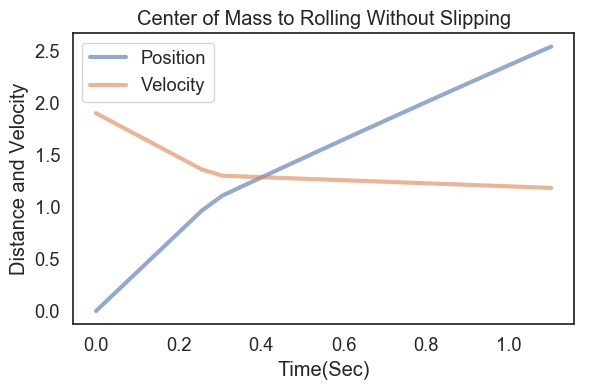

In [319]:
plt.figure(dpi = 100)
plot(results.x,label='Position')
plot(results.vx,label='Velocity')
#plot(results.omega,label='Omega')
#plot(results.theta,label='Theta')

decorate(title=
         'Center of Mass to Rolling Without Slipping',
         xlabel='Time(Sec)',
         ylabel='Distance and Velocity')

## Sweet Spot

In [278]:
def update_func(state, t, system): #Ball Hit at Heights Above Center of Mass
    
    x, theta, v, omega = state
    unpack(system)
    t=t*s

    #Linear Equations
    v=v_0-(cof_f*g*t)
  
    #a=-cof_f*g
  #  dvdt = -v
    a = -cof_f*g
    
   # a = -r_ball*alpha
    

    omega=v/r_ball*radian
    
        
    #Rotational Equations 
    h = (2/5)*dvdt
    f_app = 
    tau  = F_f*r_ball + f_app*h#Should torque be torque applied by friction and initial height
    alpha  = tau / I *radian
    
    
    return v, omega, a, alpha

SyntaxError: invalid syntax (<ipython-input-278-f46883b2f87d>, line 22)